In [ ]:
import pandas as pd
import numpy as np
import keras
import nltk
import sklearn
import matplotlib.pyplot as plt
data = pd.read_csv('train.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
datatest = pd.read_csv('test.csv')
data

,tweet_id,sentiment,tweet_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...
...,...,...,...
21625,522949024132112384,neutral,"the day after newark ill be able to say """"i me..."
21626,522372593312350209,neutral,FEC hold farewell session for seven ministers ...
21627,522515200592052224,neutral,Luca Di Montezemolo (who's last day was Monday...
21628,523089087155437568,positive,Coffee is pretty much the answer to all questi...


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(data['tweet_text'][0],'lxml').text
soup

'Gas by my house hit $3.39!!!! I\\u2019m going to Chapel Hill on Sat. :)'

In [ ]:
import re
re.sub('[^a-zA-Z]',' ',data['tweet_text'][0])

'Gas by my house hit           I u    m going to Chapel Hill on Sat    '

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
word_tokenize((data['tweet_text'][0]).lower())[0:20]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['gas',
 'by',
 'my',
 'house',
 'hit',
 '$',
 '3.39',
 '!',
 '!',
 '!',
 '!',
 'i\\u2019m',
 'going',
 'to',
 'chapel',
 'hill',
 'on',
 'sat',
 '.',
 ':']

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stopword = set(stopwords.words('english')+list(punctuation))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
[w for w in word_tokenize(data['tweet_text'][0]) if w not in stopword]


['Gas', 'house', 'hit', '3.39', 'I\\u2019m', 'going', 'Chapel', 'Hill', 'Sat']

In [ ]:
from bs4 import BeautifulSoup
import re
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma  =WordNetLemmatizer()
from nltk.corpus import stopwords
from string import punctuation
stopword = set(stopwords.words('english')+list(punctuation))
def clean_text(df):
    tweet_text=[]
    for i in range(0,len(df)):
        texts = df[i]
        texts = BeautifulSoup(texts,'lxml').text
        texts = re.sub('[^a-zA-Z]',' ',texts)
        texts = str(texts).lower()
        texts = word_tokenize(texts)
        texts = [lemma.lemmatize(w) for w in texts ]
        texts = ' '.join(texts)
        tweet_text.append(texts)
    return tweet_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
df = data['tweet_text']
clean_train = clean_text(df)
clean_train[0]

'gas by my house hit i u m going to chapel hill on sat'

In [ ]:
df1 = datatest['tweet_text']
clean_test = clean_text(df1)
clean_test[0]

'jjuueellzz down in the atlantic city ventnor margate ocean city area i m just waiting for the coordinator to hopefully call me tomorrow'

In [ ]:
df = data
df['clean_text'] = clean_train
df.head()

,tweet_id,sentiment,tweet_text,clean_text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,gas by my house hit i u m going to chapel hill...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,theo walcott is still shit u c watch rafa and ...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,it not that i u m a gsp fan u c i just hate ni...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,iranian general say israel u s iron dome can u...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,tehran u c mon amour obama tried to establish ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(min_df=5, max_df=0.95, max_features = 7000, ngram_range = ( 1, 2 ),
                              sublinear_tf = True)
tfidf = tfidf.fit(df['clean_text'])


In [ ]:
X = tfidf.transform(df['clean_text'])
X.shape

(21630, 7000)

In [ ]:
y = df['sentiment'].values
y.shape

(21630,)

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
model = lr(random_state=0)
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df1 = datatest
df1['clean_text']=clean_test
df1.head()

,tweet_id,tweet_text,clean_text
0,264238274963451904,"@jjuueellzz down in the Atlantic city, ventnor...",jjuueellzz down in the atlantic city ventnor m...
1,218775148495515649,Musical awareness: Great Big Beautiful Tomorro...,musical awareness great big beautiful tomorrow...
2,258965201766998017,On Radio786 100.4fm 7:10 Fri Oct 19 Labour ana...,on radio fm fri oct labour analyst shawn hatti...
3,262926411352903682,"Kapan sih lo ngebuktiin,jan ngomong doang Susa...",kapan sih lo ngebuktiin jan ngomong doang susa...
4,171874368908050432,"Excuse the connectivity of this live stream, f...",excuse the connectivity of this live stream fr...


In [ ]:
X1 = tfidf.transform(df1['clean_text'])
X1.shape

(5398, 7000)

In [ ]:
y_pred = model.predict(X1)
y_pred

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'neutral',
       'positive'], dtype=object)

In [ ]:
frame = pd.DataFrame({'tweet_id': datatest['tweet_id'],'Sentiment': y_pred})
frame

,tweet_id,Sentiment
0,264238274963451904,neutral
1,218775148495515649,positive
2,258965201766998017,neutral
3,262926411352903682,neutral
4,171874368908050432,neutral
...,...,...
5393,210378118865756160,neutral
5394,245177521304399872,neutral
5395,259280987089932288,neutral
5396,201113950211940352,neutral


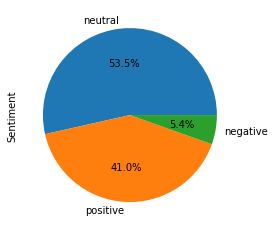

In [ ]:
plt.figure()
frame['Sentiment'].value_counts().plot.pie(autopct='%3.1f%%')
plt.show()

In [ ]:
filename = 'class.csv'
frame.to_csv(filename, index = False)